In [1]:
from point import Point
from squareLattice import SquareLattice
from simulator import Simulator
from utils import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
lattice_big = SquareLattice(0.2, 0.02)

100%|██████████| 15625/15625 [00:00<00:00, 561451.60it/s]


In [3]:
simulator_big = Simulator(lattice_big, sqr = 0)

100%|██████████| 15625/15625 [00:00<00:00, 565175.02it/s]


In [4]:
stats = simulator_big.step(3000000, 1000000)

100%|██████████| 3000000/3000000 [3:22:25<00:00, 247.00it/s]  


In [5]:
ret, Yb_0, Yb_1, Tm_0, Tm_1, Tm_2 = stats

In [6]:
ret

[244263, 190543, 46111, 3484, 3343, 0]

In [7]:
sum(Yb_0)/len(Yb_0), sum(Yb_1)/len(Yb_1),sum(Tm_0)/len(Tm_0),sum(Tm_1)/len(Tm_1),sum(Tm_2)/len(Tm_2)

(14140.595772, 63.404228, 1405.476761, 15.3559685, 0.1672705)

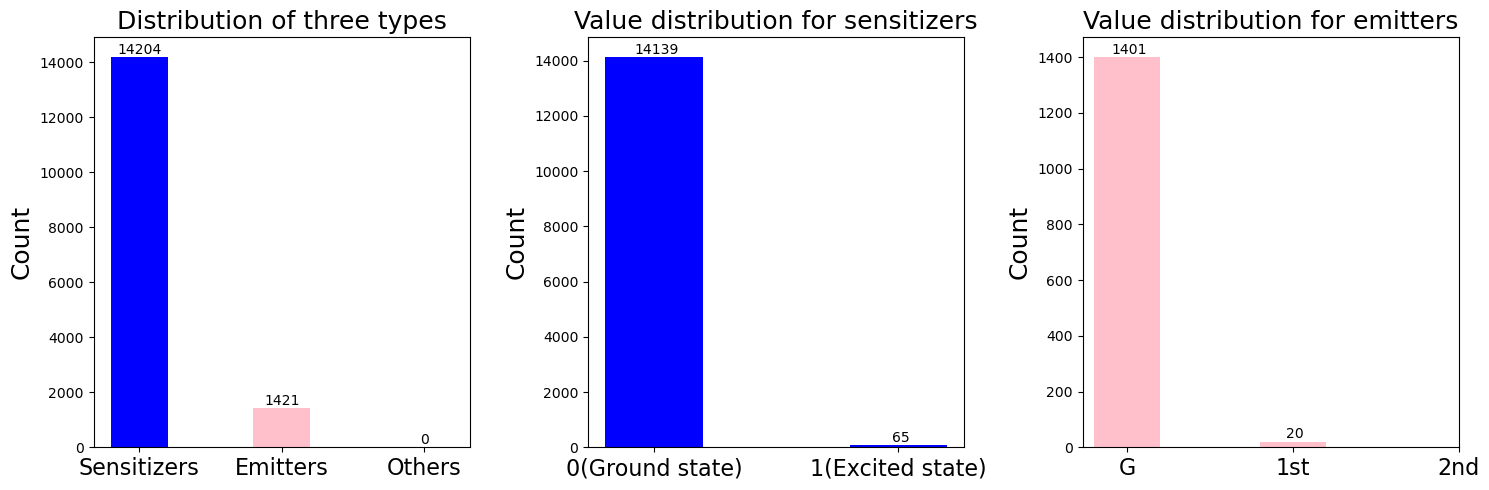

In [8]:
simulator_big.lattice.plot_distributions()

In [15]:
tag_default={'S1S0':100000, # energy transfer
     'c1':2.5*10**4,'c2':3.2*10**3, # upconversion
     'Ws':1000, # decay of sensitizer
     'W10':1000, 'W20':7000, # decay of activator
     'A1S0': 10000, # activator transfer energy back to sensitizer
     'A1A0': 5000, 'A1A1':600, # activator cross relaxation 
     'laser': 5.76*10**(-6)} # 100W

In [16]:
lattice_power = SquareLattice(0.2, 0.02)

100%|██████████| 15625/15625 [00:00<00:00, 522190.88it/s]


In [17]:
uc_intensities = []
for w in [1, 2, 3, 4, 5, 6, 7, 8]:
    tag_new = tag_default.copy()
    tag_new['laser'] = tag_default['laser']/4*w
    simulator_power = Simulator(lattice_power, tag =tag_new)
    ret, Yb_0, Yb_1, Tm_0, Tm_1, Tm_2 = simulator_power.step(300000, 100000)
    uc_intensities.append(ret[4])
    print(w, ret)
    print(sum(Yb_0)/len(Yb_0), sum(Yb_1)/len(Yb_1),sum(Tm_0)/len(Tm_0),sum(Tm_1)/len(Tm_1),sum(Tm_2)/len(Tm_2))

100%|██████████| 300000/300000 [19:28<00:00, 256.64it/s]


1 [6108, 4810, 1230, 24, 23, 0]
14187.547565 16.452435 1417.04756 3.94523 0.00721


100%|██████████| 300000/300000 [19:47<00:00, 252.53it/s]


2 [12281, 9690, 2343, 96, 92, 0]
14171.72068 32.27932 1413.030965 7.92552 0.043515


100%|██████████| 300000/300000 [20:10<00:00, 247.86it/s]


3 [18429, 14479, 3419, 216, 208, 0]
14156.457635 47.542365 1409.43083 11.472685 0.096485


100%|██████████| 300000/300000 [20:16<00:00, 246.53it/s]


4 [24268, 18949, 4533, 322, 309, 0]
14139.770735 64.229265 1405.252005 15.59954 0.148455


100%|██████████| 300000/300000 [20:44<00:00, 241.04it/s]


5 [30302, 23400, 5646, 534, 510, 0]
14124.73333 79.26667 1401.5724 19.15357 0.27403


100%|██████████| 300000/300000 [20:32<00:00, 243.31it/s]


6 [36360, 27964, 6641, 752, 719, 0]
14110.966075 93.033925 1397.936125 22.701 0.362875


100%|██████████| 300000/300000 [21:04<00:00, 237.25it/s]


7 [42783, 32460, 7878, 1062, 1023, 0]
14095.6413 108.3587 1394.37757 26.1289 0.49353


100%|██████████| 300000/300000 [21:06<00:00, 236.85it/s]

8 [48556, 36823, 8778, 1304, 1250, 0]
14081.164335 122.835665 1390.84189 29.517395 0.640715


In [18]:
uc_intensities

[23, 92, 208, 309, 510, 719, 1023, 1250]

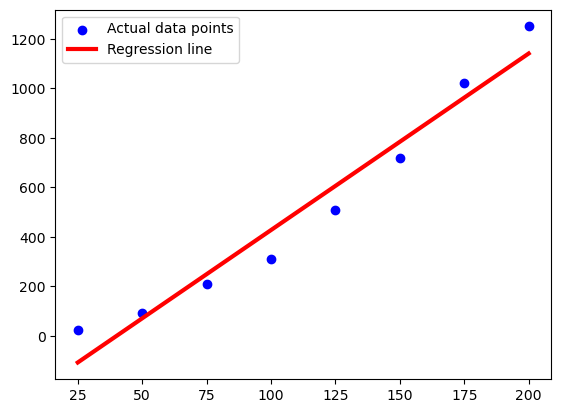

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
x = np.array([25*i for i in range(1, 9)]).reshape(-1, 1)
y = uc_intensities
model = LinearRegression()
model.fit(x, y)
plt.scatter(x, y, color='blue', label='Actual data points')
y_pred = model.predict(x)
plt.plot(x, y_pred, color='red', linewidth=3, label='Regression line')
plt.legend()
plt.show()

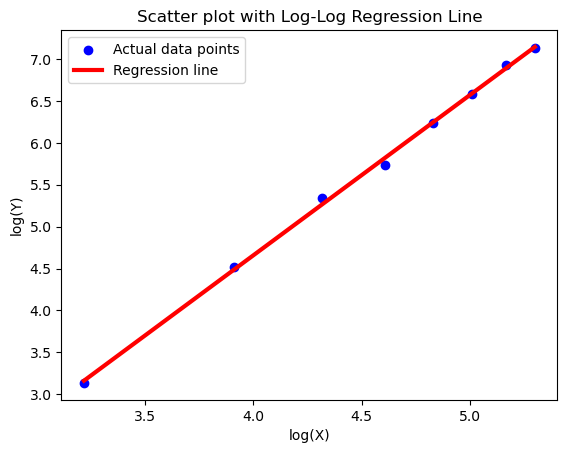

In [20]:
log_x = np.log(x)
log_y = np.log(y)

model = LinearRegression()
model.fit(log_x, log_y)

# Scatter plot of the log-transformed data points
plt.scatter(log_x, log_y, color='blue', label='Actual data points')

# Predict on the log-transformed x values
log_y_pred = model.predict(log_x)

# Plot the regression line on the log-transformed scale
plt.plot(log_x, log_y_pred, color='red', linewidth=3, label='Regression line')

# Add labels and legend
plt.xlabel('log(X)')
plt.ylabel('log(Y)')
plt.title('Scatter plot with Log-Log Regression Line')
plt.legend()

# Show the plot
plt.show()

In [1]:
model.coef_

NameError: name 'model' is not defined